In [5]:
import pandas as pd
import numpy as np
import datetime

import time
import matplotlib.pyplot as plt
from numba import jit

from datetime import datetime
import seaborn as sns

import warnings
warnings.filterwarnings('ignore')

## Import Data

In [2]:
df= pd.read_csv('/Users/ireneberros/Documents/model/data/BITSTAMP_BTCUSD, 1D_2e0c1.csv')

In [4]:
df.head(2).append(df.tail(2))

time      open      high       low     close  Shapes  Shapes.1  \
0     1413763200    389.06    390.65    376.20    381.21     1.0       0.0   
1     1413849600    381.00    393.52    378.98    385.81     0.0       0.0   
3114  1683072000  28682.00  29276.00  28138.00  29033.00     NaN       NaN   
3115  1683158400  29043.00  29378.00  28694.00  28894.00     NaN       NaN   

              Plot  Conversion Line  Base Line  ...  Lower Bollinger Band  \
0       377.986892           386.35    349.450  ...                   NaN   
1       382.451169           393.03    346.495  ...                   NaN   
3114  28342.569231         28609.50  29008.000  ...                   NaN   
3115  28258.852308         28632.00  29008.000  ...                   NaN   

            RVI  RVI-based MA  Upper Bollinger Band.1  Lower Bollinger Band.1  \
0     44.365689     53.930141                     NaN                     NaN   
1     47.520448     54.427471                     NaN                     NaN   
3114  46.943268     40.654943                     NaN                     NaN   
3115  43.183305     41.105203                     NaN                     NaN   

             %K         %D          K          D         %R  
0     65.177050  73.687037  79.302804  80.818502 -34.822950  
1     64.660663  68.296983  72.498171  77.945166 -35.339337  
3114  67.477803  49.397384  50.752873  46.887820 -32.522197  
3115  62.906939  59.915193  66.227800  54.360539 -37.093061  

[4 rows x 39 columns]

In [5]:
df['time'] = df['time'].apply(lambda x: datetime.utcfromtimestamp(x).strftime('%m-%d-%Y'))

In [6]:
df.head(2).append(df.tail(2))

time      open      high       low     close  Shapes  Shapes.1  \
0     10-20-2014    389.06    390.65    376.20    381.21     1.0       0.0   
1     10-21-2014    381.00    393.52    378.98    385.81     0.0       0.0   
3114  05-03-2023  28682.00  29276.00  28138.00  29033.00     NaN       NaN   
3115  05-04-2023  29043.00  29378.00  28694.00  28894.00     NaN       NaN   

              Plot  Conversion Line  Base Line  ...  Lower Bollinger Band  \
0       377.986892           386.35    349.450  ...                   NaN   
1       382.451169           393.03    346.495  ...                   NaN   
3114  28342.569231         28609.50  29008.000  ...                   NaN   
3115  28258.852308         28632.00  29008.000  ...                   NaN   

            RVI  RVI-based MA  Upper Bollinger Band.1  Lower Bollinger Band.1  \
0     44.365689     53.930141                     NaN                     NaN   
1     47.520448     54.427471                     NaN                     NaN   
3114  46.943268     40.654943                     NaN                     NaN   
3115  43.183305     41.105203                     NaN                     NaN   

             %K         %D          K          D         %R  
0     65.177050  73.687037  79.302804  80.818502 -34.822950  
1     64.660663  68.296983  72.498171  77.945166 -35.339337  
3114  67.477803  49.397384  50.752873  46.887820 -32.522197  
3115  62.906939  59.915193  66.227800  54.360539 -37.093061  

[4 rows x 39 columns]

## EDA

In [7]:
df.columns #EMA/OEV

Index(['time', 'open', 'high', 'low', 'close', 'Shapes', 'Shapes.1', 'Plot',
       'Conversion Line', 'Base Line', 'Lagging Span', 'Leading Span A',
       'Leading Span B', 'Kumo Cloud Upper Line', 'Kumo Cloud Lower Line',
       'Basis', 'Upper', 'Lower', 'ATR', 'Detrended Price Oscillator', 'HV',
       'Futures Open Interest', 'Crypto Open Interest (Open)',
       'Crypto Open Interest (High', 'Crypto Open Interest (Low)',
       'Crypto Open Interest (Close)', 'RSI', 'RSI-based MA',
       'Upper Bollinger Band', 'Lower Bollinger Band', 'RVI', 'RVI-based MA',
       'Upper Bollinger Band.1', 'Lower Bollinger Band.1', '%K', '%D', 'K',
       'D', '%R'],
      dtype='object')

In [8]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3116 entries, 0 to 3115
Data columns (total 39 columns):
 #   Column                        Non-Null Count  Dtype  
---  ------                        --------------  -----  
 0   time                          3116 non-null   object 
 1   open                          3116 non-null   float64
 2   high                          3116 non-null   float64
 3   low                           3116 non-null   float64
 4   close                         3116 non-null   float64
 5   Shapes                        3114 non-null   float64
 6   Shapes.1                      3114 non-null   float64
 7   Plot                          3116 non-null   float64
 8   Conversion Line               3116 non-null   float64
 9   Base Line                     3116 non-null   float64
 10  Lagging Span                  3091 non-null   float64
 11  Leading Span A                3091 non-null   float64
 12  Leading Span B                3091 non-null   float64
 13  Kum

In [9]:
df.describe()

open          high           low         close       Shapes  \
count   3116.000000   3116.000000   3116.000000   3116.000000  3114.000000   
mean   13445.005408  13813.974753  13027.515080  13454.258742     0.132627   
std    16072.954481  16510.695656  15560.437135  16073.973762     0.339225   
min      172.000000    212.840000    152.400000    171.410000     0.000000   
25%      769.420000    778.542500    760.467500    769.885000     0.000000   
50%     7510.855000   7716.350000   7317.685000   7507.615000     0.000000   
75%    19333.477500  19681.500000  18969.000000  19344.750000     0.000000   
max    67547.490000  69000.000000  66250.000000  67559.000000     1.000000   

          Shapes.1          Plot  Conversion Line     Base Line  Lagging Span  \
count  3114.000000   3116.000000      3116.000000   3116.000000   3091.000000   
mean      0.134232  13454.593582     13353.663427  13300.697909  13560.189822   
std       0.340957  16135.281902     15943.458326  15844.598704  16095.463130   
min       0.000000    194.413108       195.700000    222.180000    171.410000   
25%       0.000000    763.757708       758.983750    739.821250    872.715000   
50%       0.000000   7327.957815      7408.795000   7444.285000   7617.980000   
75%       0.000000  19251.523708     19356.875000  19392.000000  19422.500000   
max       1.000000  65784.648708     65198.285000  62712.500000  67559.000000   

       ...  Lower Bollinger Band          RVI  RVI-based MA  \
count  ...                   0.0  3116.000000   3116.000000   
mean   ...                   NaN    52.731461     52.758238   
std    ...                   NaN    13.362213     10.385937   
min    ...                   NaN     8.520556     27.915350   
25%    ...                   NaN    43.741488     45.307863   
50%    ...                   NaN    52.041442     51.671109   
75%    ...                   NaN    60.913616     59.864388   
max    ...                   NaN    94.099729     85.217528   

       Upper Bollinger Band.1  Lower Bollinger Band.1           %K  \
count                     0.0                     0.0  3116.000000   
mean                      NaN                     NaN    55.997422   
std                       NaN                     NaN    28.318431   
min                       NaN                     NaN     0.000000   
25%                       NaN                     NaN    31.244163   
50%                       NaN                     NaN    57.906030   
75%                       NaN                     NaN    82.351547   
max                       NaN                     NaN   100.000000   

                %D             K             D           %R  
count  3116.000000  3.116000e+03  3.116000e+03  3116.000000  
mean     56.001449  5.159955e+01  5.160618e+01   -44.002578  
std      26.636997  3.261141e+01  3.136571e+01    28.318431  
min       2.746794 -2.842171e-14 -2.847105e-14  -100.000000  
25%      31.964931  2.085232e+01  2.216226e+01   -68.755837  
50%      57.916485  5.208582e+01  5.253047e+01   -42.093970  
75%      80.806908  8.251439e+01  8.125013e+01   -17.648453  
max      98.756656  1.000000e+02  1.000000e+02     0.000000  

[8 rows x 38 columns]

In [10]:
date_feat = ['time']
target = ['close']
numerical_feat = ['open', 'high', 'low', 'Shapes', 'Shapes.1', 'Plot',
       'Conversion Line', 'Base Line', 'Lagging Span', 'Leading Span A',
       'Leading Span B', 'Kumo Cloud Upper Line', 'Kumo Cloud Lower Line',
       'Basis', 'Upper', 'Lower', 'ATR', 'Detrended Price Oscillator', 'HV',
       'Futures Open Interest', 'Crypto Open Interest (Open)',
       'Crypto Open Interest (High', 'Crypto Open Interest (Low)',
       'Crypto Open Interest (Close)', 'RSI', 'RSI-based MA',
       'Upper Bollinger Band', 'Lower Bollinger Band', 'RVI', 'RVI-based MA',
       'Upper Bollinger Band.1', 'Lower Bollinger Band.1', '%K', '%D', 'K',
       'D', '%R']


### Missing values

In [11]:
# Check if there are rows with high missing ratio we should consider as observations to remove
df.apply(lambda df: df.isnull().sum()/len(df), axis=1)

0       0.333333
1       0.333333
2       0.333333
3       0.333333
4       0.333333
          ...   
3111    0.256410
3112    0.256410
3113    0.256410
3114    0.307692
3115    0.307692
Length: 3116, dtype: float64

<Axes: ylabel='Count'>

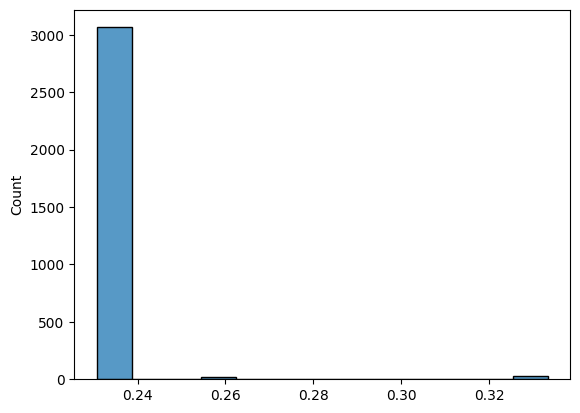

In [12]:
sns.histplot(df.apply(lambda df: df.isnull().sum()/len(df), axis=1))

El maximo ratio per row es 0.33, OK

In [13]:
# me cargo todas las filas que sean todas nan

df.drop(['Futures Open Interest', 'Crypto Open Interest (Open)',
       'Crypto Open Interest (High', 'Crypto Open Interest (Low)',
       'Crypto Open Interest (Close)', 'Upper Bollinger Band', 'Lower Bollinger Band',
       'Upper Bollinger Band.1', 'Lower Bollinger Band.1'], axis=1, inplace=True)

In [14]:
df.columns

Index(['time', 'open', 'high', 'low', 'close', 'Shapes', 'Shapes.1', 'Plot',
       'Conversion Line', 'Base Line', 'Lagging Span', 'Leading Span A',
       'Leading Span B', 'Kumo Cloud Upper Line', 'Kumo Cloud Lower Line',
       'Basis', 'Upper', 'Lower', 'ATR', 'Detrended Price Oscillator', 'HV',
       'RSI', 'RSI-based MA', 'RVI', 'RVI-based MA', '%K', '%D', 'K', 'D',
       '%R'],
      dtype='object')

In [15]:
#estudio nulos en las 5 columnas lagging, leading, Kumo

df[df['Lagging Span'].isna() == True].head()

time     open     high      low    close  Shapes  Shapes.1  \
3091  04-10-2023  28353.0  29789.0  28184.0  29652.0     0.0       0.0   
3092  04-11-2023  29657.0  30575.0  29617.0  30246.0     0.0       0.0   
3093  04-12-2023  30255.0  30503.0  29689.0  29903.0     0.0       0.0   
3094  04-13-2023  29914.0  30614.0  29889.0  30410.0     0.0       0.0   
3095  04-14-2023  30411.0  31035.0  30001.0  30498.0     0.0       1.0   

              Plot  Conversion Line  Base Line  ...         HV        RSI  \
3091  28472.015385          28512.5    27009.0  ...  30.459655  68.815742   
3092  28775.095385          28905.5    27764.5  ...  31.580418  71.542710   
3093  28961.920000          29130.5    28558.0  ...  31.852023  67.852888   
3094  29284.123077          29168.5    28577.5  ...  29.857430  70.291897   
3095  29578.726154          29379.0    28788.0  ...  29.919242  70.707320   

      RSI-based MA        RVI  RVI-based MA         %K         %D          K  \
3091     61.508366  60.056657     53.313946  95.639720  72.795337  50.969507   
3092     62.363129  67.949477     54.130521  90.146751  84.738510  82.940620   
3093     62.619342  53.972248     53.775004  79.874214  88.553561  90.746570   
3094     63.210532  63.595774     54.366997  93.960924  87.993963  87.609750   
3095     63.696085  71.112427     55.268303  85.864701  86.566613  85.514738   

              D         %R  
3091  24.757839  -4.360280  
3092  50.515434  -9.853249  
3093  74.885566 -20.125786  
3094  87.098980  -6.039076  
3095  87.957019 -14.135299  

[5 rows x 30 columns]

In [16]:

df[df['Leading Span A'].isna() == True].head()

time    open    high     low   close  Shapes  Shapes.1        Plot  \
0  10-20-2014  389.06  390.65  376.20  381.21     1.0       0.0  377.986892   
1  10-21-2014  381.00  393.52  378.98  385.81     0.0       0.0  382.451169   
2  10-22-2014  385.79  388.87  380.00  382.04     0.0       0.0  386.366985   
3  10-23-2014  382.05  384.55  352.40  357.18     0.0       0.0  384.603200   
4  10-24-2014  356.81  363.71  344.34  358.86     0.0       0.0  383.168431   

   Conversion Line  Base Line  ...         HV        RSI  RSI-based MA  \
0          386.350    349.450  ...  45.359169  47.104207     45.397665   
1          393.030    346.495  ...  45.474554  49.073818     46.868596   
2          394.045    346.495  ...  39.438123  47.512347     47.587320   
3          378.360    346.495  ...  48.674892  38.755268     47.453928   
4          371.670    346.495  ...  44.006592  39.565908     47.436956   

         RVI  RVI-based MA         %K         %D          K          D  \
0  44.365689     53.930141  65.177050  73.687037  79.302804  80.818502   
1  47.520448     54.427471  64.660663  68.296983  72.498171  77.945166   
2  44.790378     54.110717  47.890999  59.242904  62.232033  71.344336   
3  40.196103     52.954805   9.089550  40.547071  38.867667  57.865957   
4  46.840293     52.770123  19.714868  25.565139  18.511669  39.870457   

          %R  
0 -34.822950  
1 -35.339337  
2 -52.109001  
3 -90.910450  
4 -80.285132  

[5 rows x 30 columns]

In [17]:
df[df['Leading Span B'].isna()==True].head()

time    open    high     low   close  Shapes  Shapes.1        Plot  \
0  10-20-2014  389.06  390.65  376.20  381.21     1.0       0.0  377.986892   
1  10-21-2014  381.00  393.52  378.98  385.81     0.0       0.0  382.451169   
2  10-22-2014  385.79  388.87  380.00  382.04     0.0       0.0  386.366985   
3  10-23-2014  382.05  384.55  352.40  357.18     0.0       0.0  384.603200   
4  10-24-2014  356.81  363.71  344.34  358.86     0.0       0.0  383.168431   

   Conversion Line  Base Line  ...         HV        RSI  RSI-based MA  \
0          386.350    349.450  ...  45.359169  47.104207     45.397665   
1          393.030    346.495  ...  45.474554  49.073818     46.868596   
2          394.045    346.495  ...  39.438123  47.512347     47.587320   
3          378.360    346.495  ...  48.674892  38.755268     47.453928   
4          371.670    346.495  ...  44.006592  39.565908     47.436956   

         RVI  RVI-based MA         %K         %D          K          D  \
0  44.365689     53.930141  65.177050  73.687037  79.302804  80.818502   
1  47.520448     54.427471  64.660663  68.296983  72.498171  77.945166   
2  44.790378     54.110717  47.890999  59.242904  62.232033  71.344336   
3  40.196103     52.954805   9.089550  40.547071  38.867667  57.865957   
4  46.840293     52.770123  19.714868  25.565139  18.511669  39.870457   

          %R  
0 -34.822950  
1 -35.339337  
2 -52.109001  
3 -90.910450  
4 -80.285132  

[5 rows x 30 columns]

In [18]:
df[df['Kumo Cloud Upper Line'].isna()==True].head()

time    open    high     low   close  Shapes  Shapes.1        Plot  \
0  10-20-2014  389.06  390.65  376.20  381.21     1.0       0.0  377.986892   
1  10-21-2014  381.00  393.52  378.98  385.81     0.0       0.0  382.451169   
2  10-22-2014  385.79  388.87  380.00  382.04     0.0       0.0  386.366985   
3  10-23-2014  382.05  384.55  352.40  357.18     0.0       0.0  384.603200   
4  10-24-2014  356.81  363.71  344.34  358.86     0.0       0.0  383.168431   

   Conversion Line  Base Line  ...         HV        RSI  RSI-based MA  \
0          386.350    349.450  ...  45.359169  47.104207     45.397665   
1          393.030    346.495  ...  45.474554  49.073818     46.868596   
2          394.045    346.495  ...  39.438123  47.512347     47.587320   
3          378.360    346.495  ...  48.674892  38.755268     47.453928   
4          371.670    346.495  ...  44.006592  39.565908     47.436956   

         RVI  RVI-based MA         %K         %D          K          D  \
0  44.365689     53.930141  65.177050  73.687037  79.302804  80.818502   
1  47.520448     54.427471  64.660663  68.296983  72.498171  77.945166   
2  44.790378     54.110717  47.890999  59.242904  62.232033  71.344336   
3  40.196103     52.954805   9.089550  40.547071  38.867667  57.865957   
4  46.840293     52.770123  19.714868  25.565139  18.511669  39.870457   

          %R  
0 -34.822950  
1 -35.339337  
2 -52.109001  
3 -90.910450  
4 -80.285132  

[5 rows x 30 columns]

In [19]:
df[df['Kumo Cloud Lower Line'].isna()==True].head()

time    open    high     low   close  Shapes  Shapes.1        Plot  \
0  10-20-2014  389.06  390.65  376.20  381.21     1.0       0.0  377.986892   
1  10-21-2014  381.00  393.52  378.98  385.81     0.0       0.0  382.451169   
2  10-22-2014  385.79  388.87  380.00  382.04     0.0       0.0  386.366985   
3  10-23-2014  382.05  384.55  352.40  357.18     0.0       0.0  384.603200   
4  10-24-2014  356.81  363.71  344.34  358.86     0.0       0.0  383.168431   

   Conversion Line  Base Line  ...         HV        RSI  RSI-based MA  \
0          386.350    349.450  ...  45.359169  47.104207     45.397665   
1          393.030    346.495  ...  45.474554  49.073818     46.868596   
2          394.045    346.495  ...  39.438123  47.512347     47.587320   
3          378.360    346.495  ...  48.674892  38.755268     47.453928   
4          371.670    346.495  ...  44.006592  39.565908     47.436956   

         RVI  RVI-based MA         %K         %D          K          D  \
0  44.365689     53.930141  65.177050  73.687037  79.302804  80.818502   
1  47.520448     54.427471  64.660663  68.296983  72.498171  77.945166   
2  44.790378     54.110717  47.890999  59.242904  62.232033  71.344336   
3  40.196103     52.954805   9.089550  40.547071  38.867667  57.865957   
4  46.840293     52.770123  19.714868  25.565139  18.511669  39.870457   

          %R  
0 -34.822950  
1 -35.339337  
2 -52.109001  
3 -90.910450  
4 -80.285132  

[5 rows x 30 columns]

Como los 25 valores nulos de 4 filas son los 25 primeros valores me los cargo

In [20]:
df = df.iloc[25:].reset_index()

In [21]:
#hay 2 nulos en shapes

df[df['Shapes'].isna()==True]

index        time     open     high      low    close  Shapes  Shapes.1  \
3089   3114  05-03-2023  28682.0  29276.0  28138.0  29033.0     NaN       NaN   
3090   3115  05-04-2023  29043.0  29378.0  28694.0  28894.0     NaN       NaN   

              Plot  Conversion Line  ...         HV        RSI  RSI-based MA  \
3089  28342.569231          28609.5  ...  38.983363  53.392795      49.99704   
3090  28258.852308          28632.0  ...  39.129174  52.278464      50.33561   

            RVI  RVI-based MA         %K         %D          K          D  \
3089  46.943268     40.654943  67.477803  49.397384  50.752873  46.887820   
3090  43.183305     41.105203  62.906939  59.915193  66.227800  54.360539   

             %R  
3089 -32.522197  
3090 -37.093061  

[2 rows x 31 columns]

In [22]:
df['Shapes.1'].describe()

count    3089.000000
mean        0.134671
std         0.341428
min         0.000000
25%         0.000000
50%         0.000000
75%         0.000000
max         1.000000
Name: Shapes.1, dtype: float64

In [23]:
df['Shapes.1'].mode()

0    0.0
Name: Shapes.1, dtype: float64

In [24]:
# los inputo con la moda == 0
df['Shapes'].loc[df['Shapes'].isna()==True] = 0
df['Shapes.1'].loc[df['Shapes.1'].isna()==True] = 0

In [25]:
#nulos en lagging Span
df[df['Lagging Span'].isna() == True].tail() #ultimas 25 columnas 

index        time     open     high      low    close  Shapes  Shapes.1  \
3086   3111  04-30-2023  29252.0  29961.0  29115.0  29235.0     0.0       1.0   
3087   3112  05-01-2023  29254.0  29344.0  27666.0  28079.0     1.0       0.0   
3088   3113  05-02-2023  28079.0  28894.0  27876.0  28680.0     0.0       0.0   
3089   3114  05-03-2023  28682.0  29276.0  28138.0  29033.0     0.0       0.0   
3090   3115  05-04-2023  29043.0  29378.0  28694.0  28894.0     0.0       0.0   

              Plot  Conversion Line  ...         HV        RSI  RSI-based MA  \
3086  28769.873846          28501.5  ...  37.314466  55.495862     51.719387   
3087  28557.153846          28501.5  ...  39.227420  46.445045     50.841486   
3088  28425.187692          28501.5  ...  39.348264  50.926089     49.859419   
3089  28342.569231          28609.5  ...  38.983363  53.392795     49.997040   
3090  28258.852308          28632.0  ...  39.129174  52.278464     50.335610   

            RVI  RVI-based MA         %K         %D          K          D  \
3086  37.963492     41.271955  64.363221  64.062182  54.978947  51.487626   
3087  33.690337     40.787045  31.353512  52.968972  43.809645  50.638845   
3088  40.971334     40.348325  49.360837  48.359190  46.100943  48.296512   
3089  46.943268     40.654943  67.477803  49.397384  50.752873  46.887820   
3090  43.183305     41.105203  62.906939  59.915193  66.227800  54.360539   

             %R  
3086 -35.636779  
3087 -68.646488  
3088 -50.639163  
3089 -32.522197  
3090 -37.093061  

[5 rows x 31 columns]

(array([1412.,  704.,  223.,  149.,  124.,  134.,  127.,   81.,   79.,
          33.]),
 array([  171.41 ,  6910.169, 13648.928, 20387.687, 27126.446, 33865.205,
        40603.964, 47342.723, 54081.482, 60820.241, 67559.   ]),
 <BarContainer object of 10 artists>)

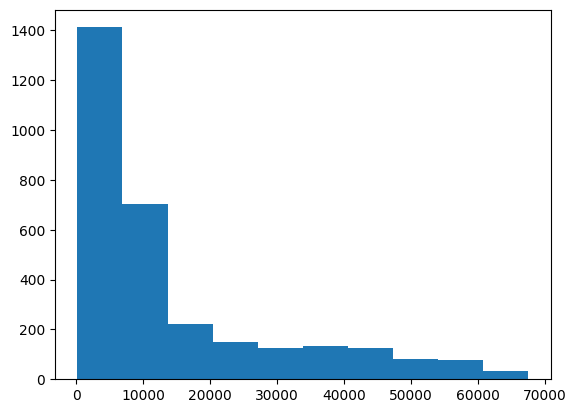

In [26]:
plt.hist(df['Lagging Span'])

In [27]:
df['Lagging Span'][3040:3066].describe()

count       26.000000
mean     29058.153846
std        990.940833
min      27254.000000
25%      28310.000000
50%      29134.000000
75%      29840.250000
max      30498.000000
Name: Lagging Span, dtype: float64

In [28]:
from sklearn.impute import KNNImputer

#voy a inputar con vecinos
imputer = KNNImputer(weights='distance')
df['Lagging Span'] = imputer.fit_transform(df[['Lagging Span']])

In [29]:
#dataset final sin nulos
df_nonan = df.drop('index', axis=1)

In [30]:
df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 30 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   time                        3091 non-null   object 
 1   open                        3091 non-null   float64
 2   high                        3091 non-null   float64
 3   low                         3091 non-null   float64
 4   close                       3091 non-null   float64
 5   Shapes                      3091 non-null   float64
 6   Shapes.1                    3091 non-null   float64
 7   Plot                        3091 non-null   float64
 8   Conversion Line             3091 non-null   float64
 9   Base Line                   3091 non-null   float64
 10  Lagging Span                3091 non-null   float64
 11  Leading Span A              3091 non-null   float64
 12  Leading Span B              3091 non-null   float64
 13  Kumo Cloud Upper Line       3091 

## Feature Engineering

In [31]:
# Date features
df_nonan['time'] = pd.to_datetime(df_nonan['time'])
df_nonan["fe_month"] = df_nonan['time'].dt.month
df_nonan["fe_weekofyear"] = df_nonan['time'].dt.isocalendar().week.astype(int)
df_nonan["fe_quarter"] = df_nonan['time'].dt.quarter
df_nonan["fe_is_month_start"] = df_nonan['time'].dt.is_month_start.astype(int)
df_nonan["fe_is_month_end"] = df_nonan['time'].dt.is_month_end.astype(int)

# new feat from price
df_nonan['log_price'] = np.log(df_nonan['close'].astype(float))
df_nonan['return'] = df_nonan['close'].astype(float).pct_change().dropna()
df_nonan['log_return'] = df_nonan['log_price'] - df_nonan['log_price'].shift(1)

In [32]:
#VARIABLES NUEVAS QUE SE NOS OCURRAN

# Drop features
drop_list = date_feat 
df_nonan.drop(drop_list, axis=1, inplace=True)

## Multivariate Analysis

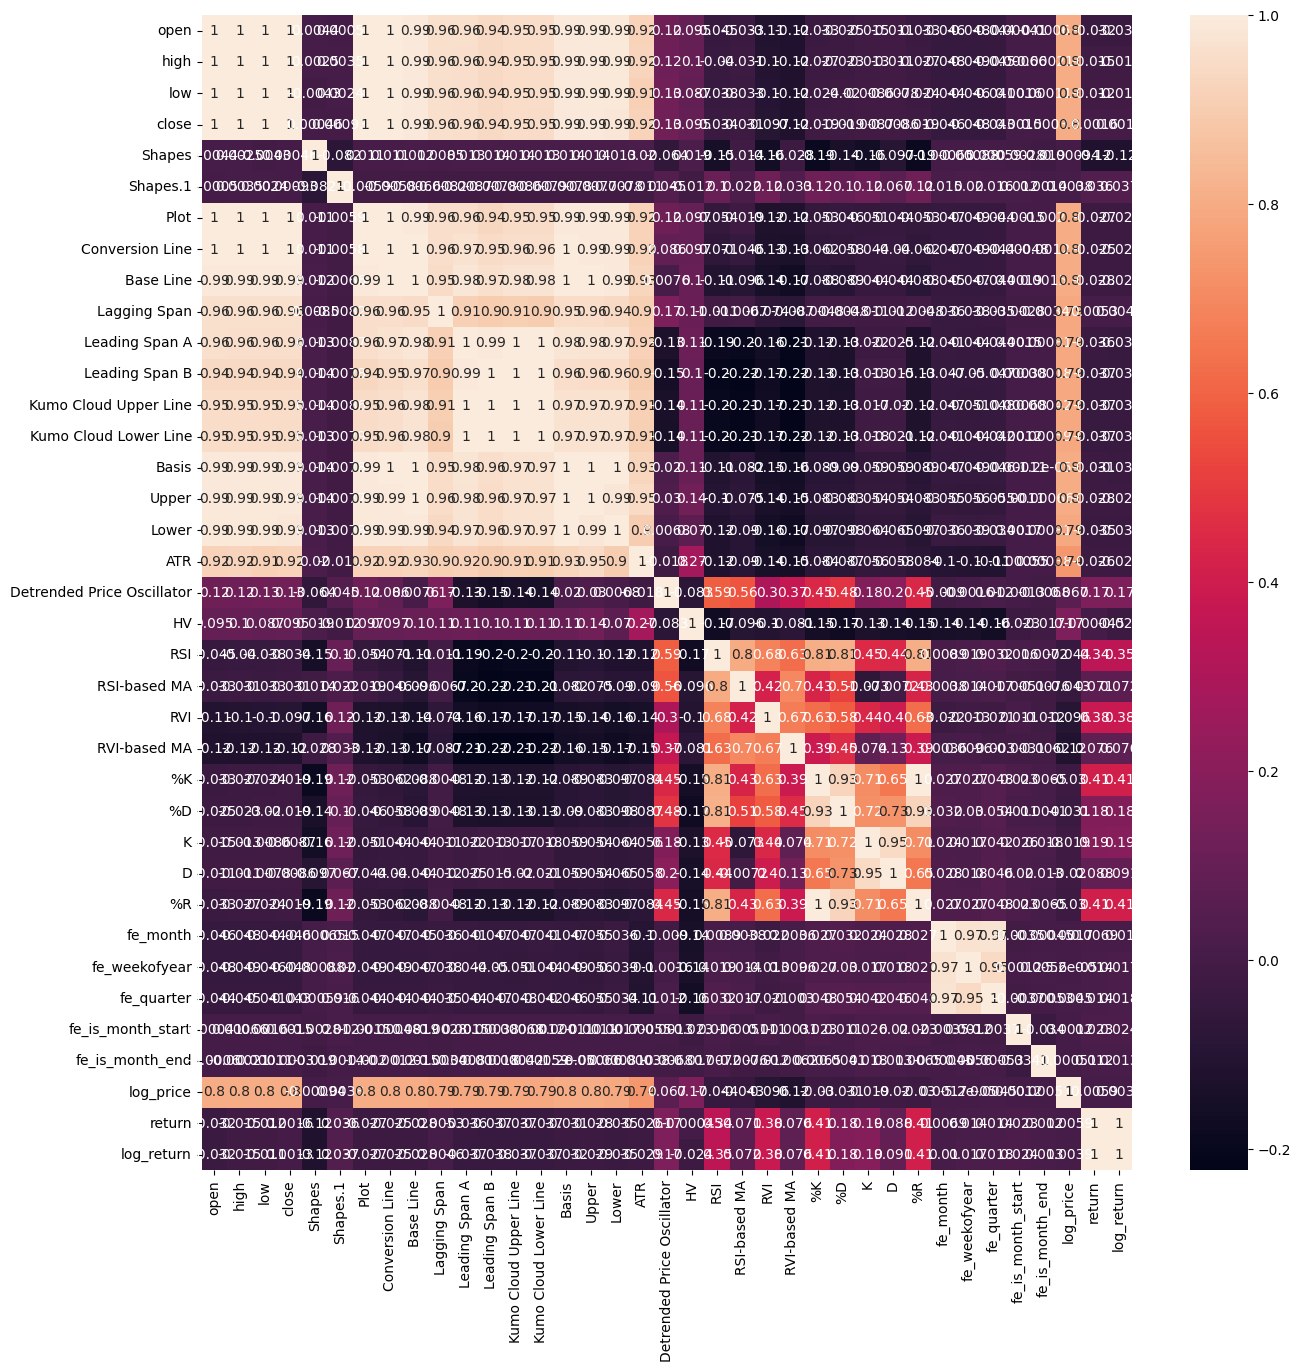

In [353]:
plt.figure(figsize=(15,15))
sns.heatmap(df_nonan.corr(), annot=True)
plt.show()

In [354]:
df_nonan.columns

Index(['open', 'high', 'low', 'close', 'Shapes', 'Shapes.1', 'Plot',
       'Conversion Line', 'Base Line', 'Lagging Span', 'Leading Span A',
       'Leading Span B', 'Kumo Cloud Upper Line', 'Kumo Cloud Lower Line',
       'Basis', 'Upper', 'Lower', 'ATR', 'Detrended Price Oscillator', 'HV',
       'RSI', 'RSI-based MA', 'RVI', 'RVI-based MA', '%K', '%D', 'K', 'D',
       '%R', 'fe_month', 'fe_weekofyear', 'fe_quarter', 'fe_is_month_start',
       'fe_is_month_end', 'log_price', 'return', 'log_return'],
      dtype='object')

In [33]:
df_nonan.drop('return', axis=1, inplace=True)

In [355]:
df_nonan.drop(['open', 'high', 'low', 'close','return','log_price', 'Shapes.1', 'Plot', 'Kumo Cloud Upper Line',
                      'Leading Span B','%R','ATR', 'Basis','Conversion Line', 'fe_weekofyear', 'fe_quarter'], axis=1, inplace=True)

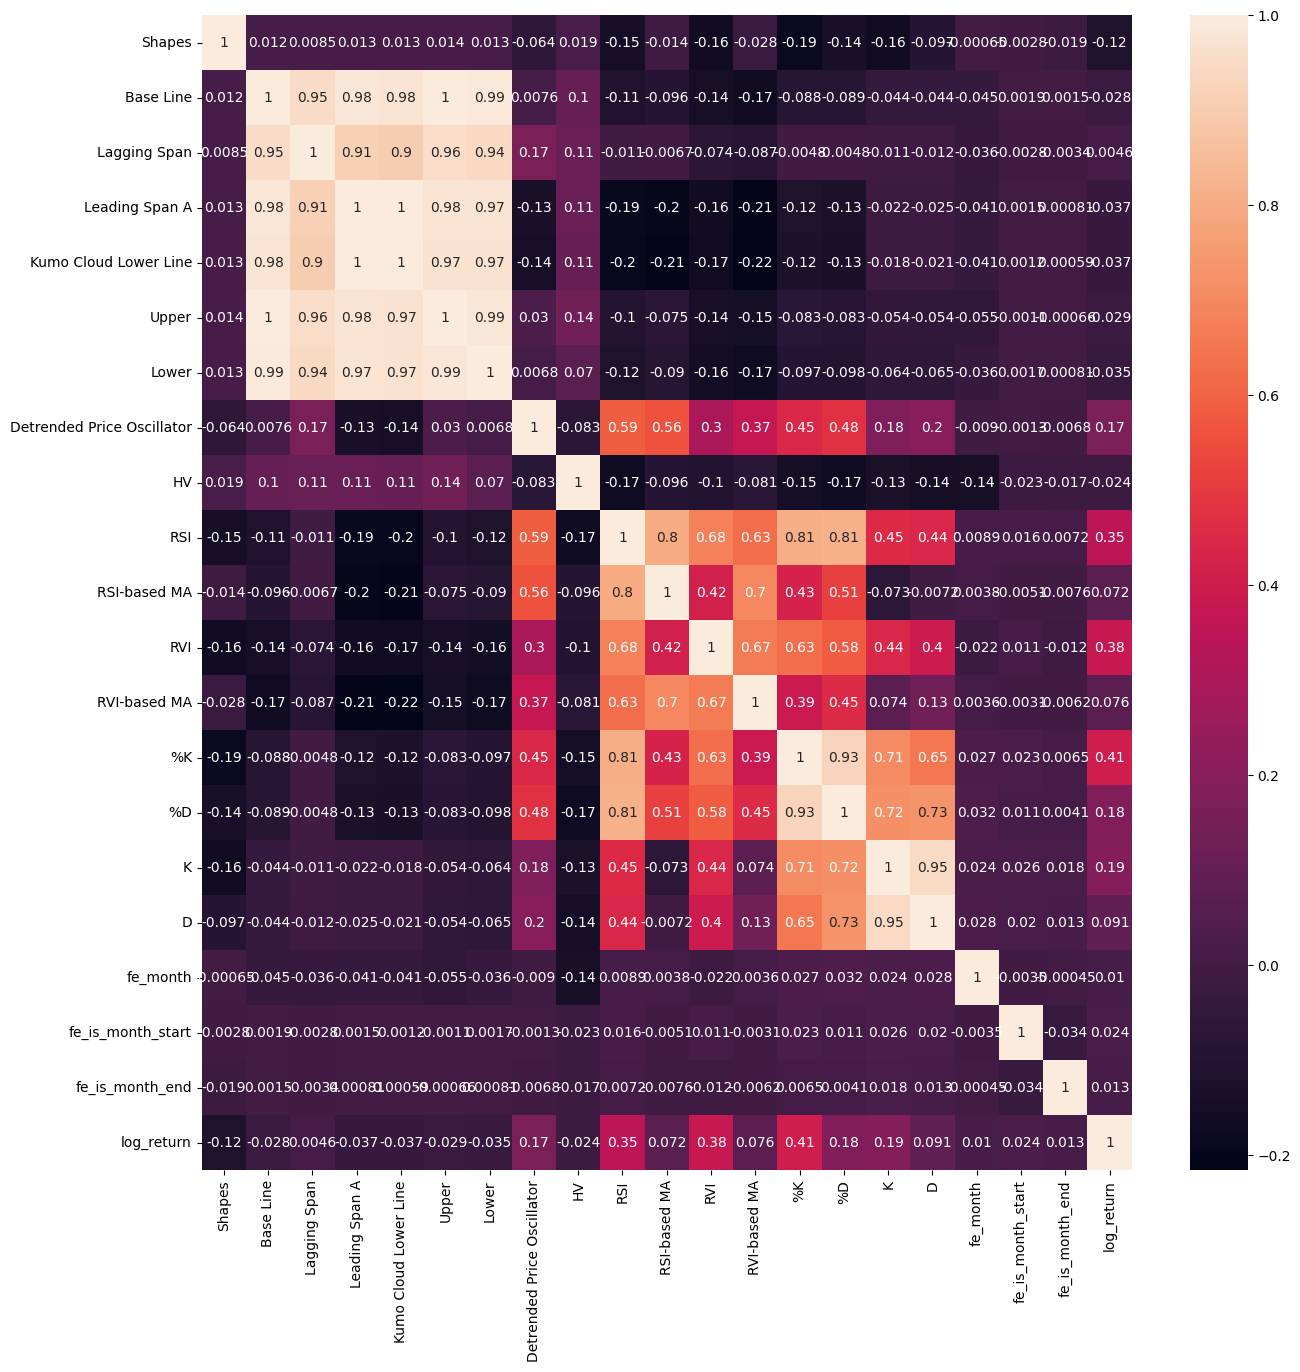

In [356]:
plt.figure(figsize=(15,15))
sns.heatmap(df_nonan.corr(), annot=True)
plt.show()

In [302]:
df_nonan.drop(['Kumo Cloud Lower Line'], axis=1, inplace=True)

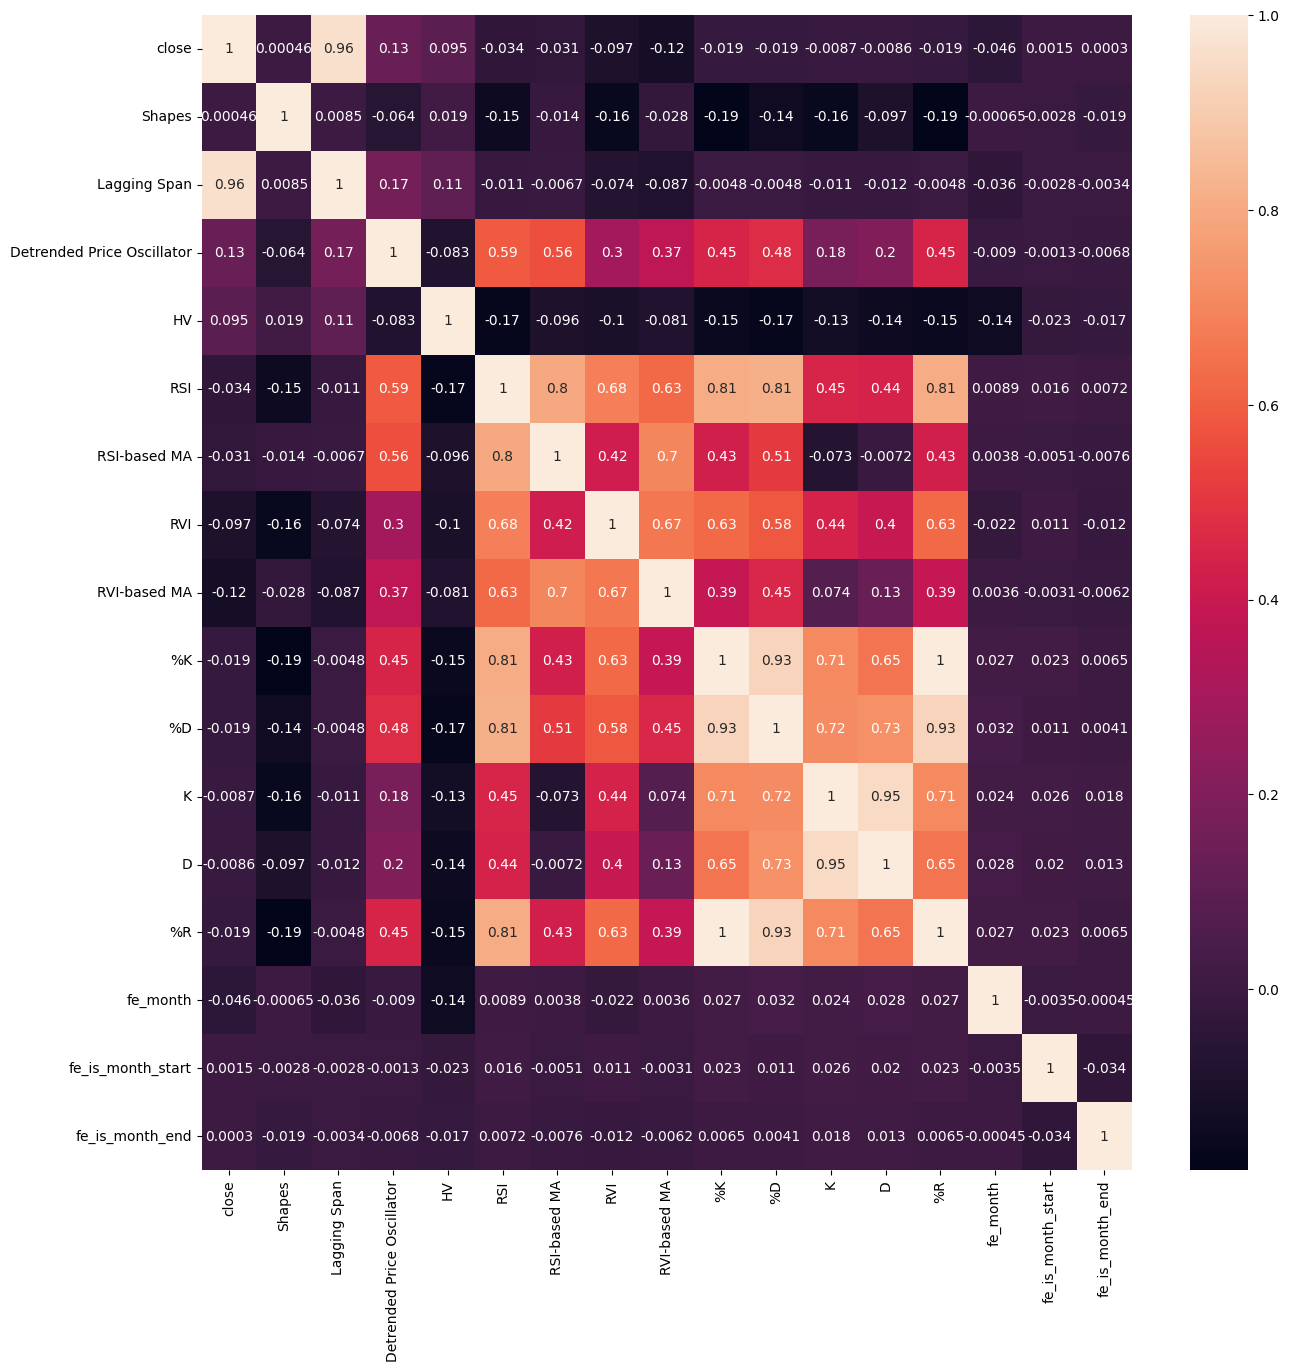

In [37]:
plt.figure(figsize=(15,15))
sns.heatmap(df_nonan.corr(), annot=True)
plt.show()

In [44]:
# df FINAL:
df_nonan.head()

open    high     low   close  Shapes  Shapes.1        Plot  \
0  417.85  420.30  382.95  399.98     0.0       0.0  371.792369   
1  399.97  407.22  369.00  376.99     1.0       0.0  376.951631   
2  376.97  395.00  375.00  389.86     0.0       0.0  383.831108   
3  389.86  415.00  375.00  387.69     0.0       1.0  388.322431   
4  388.72  394.64  371.00  374.88     0.0       0.0  390.735169   

   Conversion Line  Base Line  Lagging Span  ...          K          D  \
0          395.095    385.265        352.03  ...  88.038225  95.317147   
1          397.160    385.265        345.21  ...  71.205826  85.719089   
2          397.260    385.265        348.90  ...  59.275674  72.839908   
3          398.660    385.265        352.24  ...  53.319589  61.267030   
4          405.610    385.265        351.67  ...  47.232789  53.276017   

          %R  fe_month  fe_weekofyear  fe_quarter  fe_is_month_start  \
0 -39.283373        11             46           4                  0   
1 -56.699587        11             46           4                  0   
2 -47.834528        11             46           4                  0   
3 -49.454898        11             47           4                  0   
4 -63.171355        11             47           4                  0   

   fe_is_month_end  log_price  log_return  
0                0   5.991415         NaN  
1                0   5.932219   -0.059196  
2                0   5.965788    0.033569  
3                0   5.960206   -0.005582  
4                0   5.926606   -0.033600  

[5 rows x 36 columns]

In [45]:
df_nonan.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3091 entries, 0 to 3090
Data columns (total 36 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   open                        3091 non-null   float64
 1   high                        3091 non-null   float64
 2   low                         3091 non-null   float64
 3   close                       3091 non-null   float64
 4   Shapes                      3091 non-null   float64
 5   Shapes.1                    3091 non-null   float64
 6   Plot                        3091 non-null   float64
 7   Conversion Line             3091 non-null   float64
 8   Base Line                   3091 non-null   float64
 9   Lagging Span                3091 non-null   float64
 10  Leading Span A              3091 non-null   float64
 11  Leading Span B              3091 non-null   float64
 12  Kumo Cloud Upper Line       3091 non-null   float64
 13  Kumo Cloud Lower Line       3091 

In [34]:
df_nonan.dropna(inplace=True)
df_nonan.to_csv('/Users/ireneberros/Documents/model/data/df_final.csv', index=False)

## Features importance
* Logistic regression importances first approach

In [26]:
from sklearn.model_selection import cross_val_score
from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.feature_selection import RFE


# Modelos
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from xgboost.sklearn import XGBModel as xgb

#from lightgbm import LGBMRegressor
from catboost import CatBoostRegressor

In [64]:
df_final = pd.read_csv('/Users/ireneberros/Documents/model/data/df_final.csv')

In [65]:

target = ['log_return']
numerical_feat = ['open', 'high', 'low', 'close', 'Shapes', 'Shapes.1', 'Plot',
       'Conversion Line', 'Base Line', 'Lagging Span', 'Leading Span A',
       'Leading Span B', 'Kumo Cloud Upper Line', 'Kumo Cloud Lower Line',
       'Basis', 'Upper', 'Lower', 'ATR', 'Detrended Price Oscillator', 'HV',
       'RSI', 'RSI-based MA', 'RVI', 'RVI-based MA', '%K', '%D', 'K', 'D',
       '%R', 'fe_month', 'fe_weekofyear', 'fe_quarter', 'fe_is_month_start',
       'fe_is_month_end', 'log_price']

In [29]:

# Train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

n=int(len(df_final)*0.02) #define train test con este número

train = df_final.iloc[:-n]
test = df_final.iloc[-n:]

X_train, X_test = train.drop(target, axis=1), test.drop(target, axis=1)
y_train, y_test = train[target], test[target]

In [66]:
#df_final = df_nonan.copy()
n=int(len(df_final)*0.02) #define train test con este número

train = df_final.iloc[:-n]
test = df_final.iloc[-n:]

target = ['log_return']
# Features/target split
X = df_final.drop(target, axis=1)
y = df_final[target]

# Standarize the data to improve the regression's performance
X = (X-X.mean())/X.std()

In [31]:
# Standarize the data to improve the regression's performance
scaler = MinMaxScaler()
X[numerical_feat]= scaler.fit_transform(X[numerical_feat])
test[numerical_feat] = scaler.transform(test[numerical_feat])

In [12]:
# Feature importance RFE with linear regression
model = LinearRegression( n_jobs=-1)
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

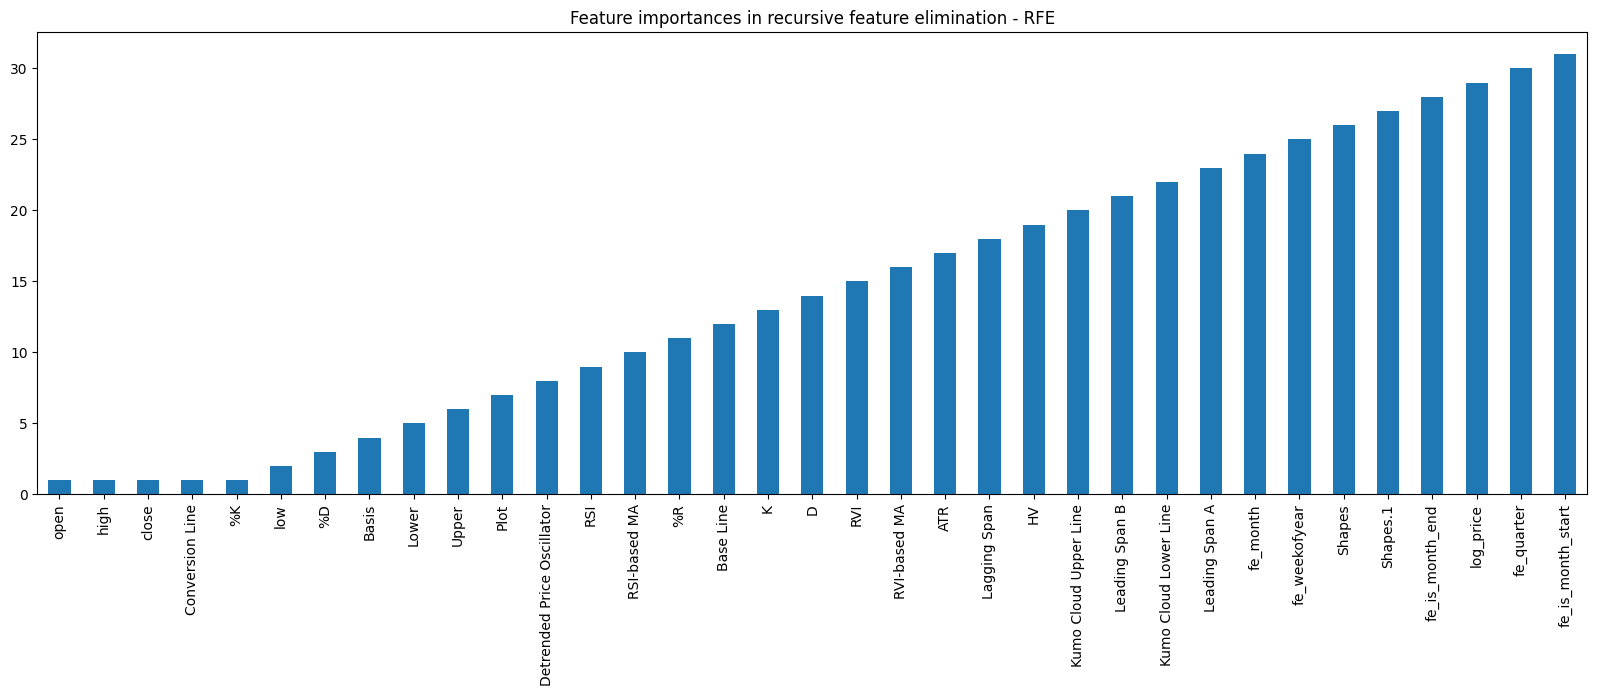

In [13]:
# Feature importances plot
importances = selector.ranking_
sorted_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(20,6))
sorted_importances.plot.bar()
plt.title("Feature importances in recursive feature elimination - RFE")
plt.show()

In [14]:
# Feature importance RFE with linear regression
model = DecisionTreeRegressor()
selector = RFE(model, n_features_to_select=5, step=1)
selector = selector.fit(X, y)

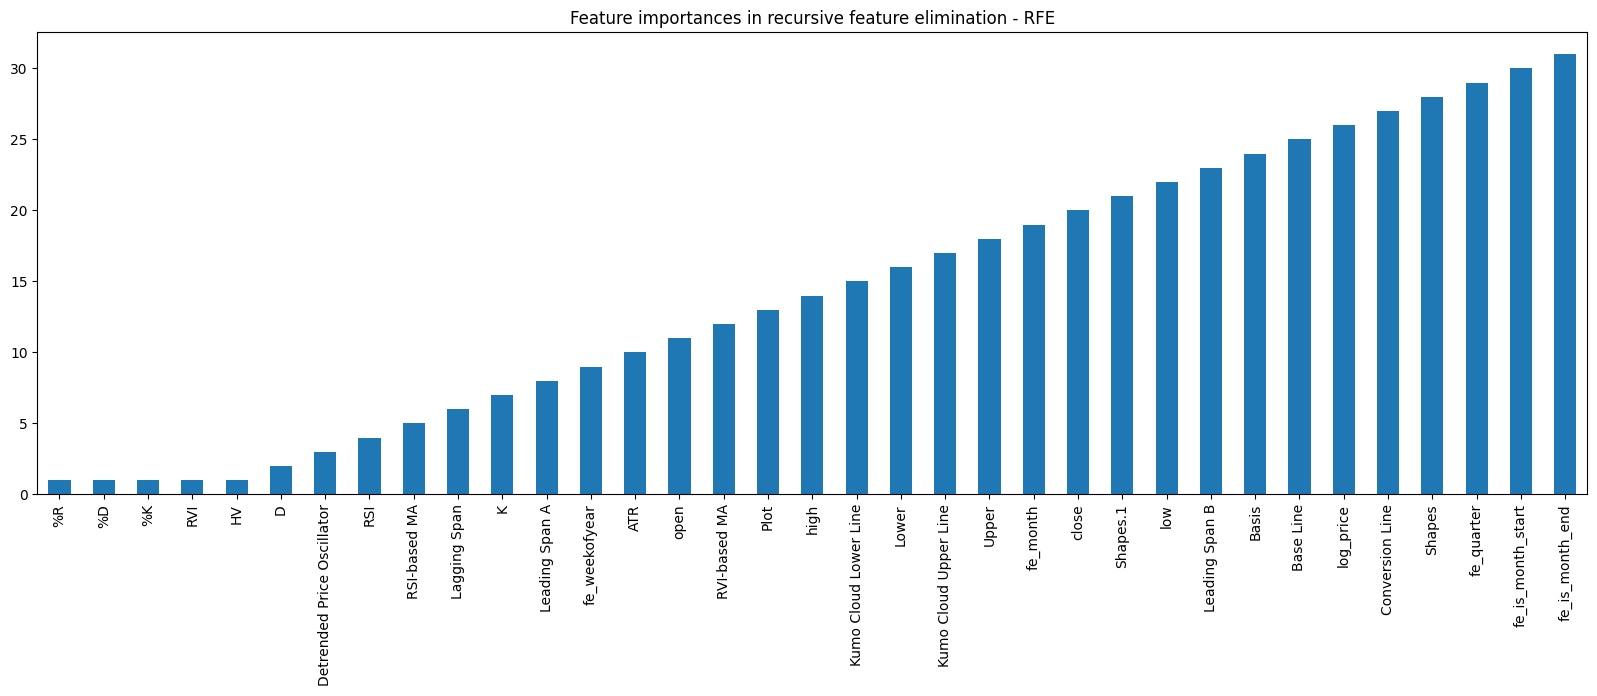

In [15]:
# Feature importances plot
importances = selector.ranking_
sorted_importances = pd.Series(importances, index=X.columns).sort_values(ascending=True)

plt.figure(figsize=(20,6))
sorted_importances.plot.bar()
plt.title("Feature importances in recursive feature elimination - RFE")
plt.show()

In [16]:
selected_features = ['%R', '%D', '%K', 'RVI', 'HV', 'RSI', 'Detrended Price Oscillator', 'open', 'RSI-based MA', 'Conversion Line', 'Basis', 'fe_weekofyear', 'Lagging Span', 'ATR']

In [17]:
selected_features2 = ['close', 'Base Line', 'Upper', 'Lower', 'Leading Span A', 'Detrended Price Oscillator', 'RSI', '%D', 'RVI', '%K']
selected_features2 = ['log_return','%K', 'RSI', 'D', 'Leading Span A', 'RVI', 'Detrended Price Oscillator', 'Kumo Cloud Lower Line', 'Base Line', 'HV', 'Shapes', 'fe_month', 'fe_is_month_end']

## Cross-val con varios modelos

In [297]:
""" Realizaremos un análisis de los siguientes modelos con las siguentes features """

seed = 42

models = []
models.append(('LR', LinearRegression()))
models.append(('DTR', DecisionTreeRegressor()))
models.append(('KNR', KNeighborsRegressor()))
models.append(('RFR', RandomForestRegressor(random_state=seed, n_jobs = -1)))
models.append(('GBR', GradientBoostingRegressor(random_state=seed)))
models.append(('XGB', xgb(random_state=seed)))
#models.append(('LGBM', LGBMRegressor(random_state=seed)))
models.append(('CATBOOST', CatBoostRegressor(random_state=seed)))

metrics = []
metrics.append(('RMSE','neg_root_mean_squared_error'))

In [298]:
""" Para plotear los resultados utilizaremos la siguiente función """
def boxplots_algorithms(results, names, metric):
        
    plt.figure(figsize=(8,8))
    plt.boxplot(results)
    plt.xticks(range(1,len(names)+1), names)
    plt.title(metric)
    plt.show()

def CustomTimeSeriesSplit(df, n_splits):
    """
    Procedimiento que define una técnica de validación cruzada específica para
    un dataset formado por series temporales
    :param group_col:
    :param X:
    :param n_splits:
    """
    n_folds = n_splits + 1

    for n in range(n_splits):
        train_indices = list()
        test_indices = list()

        group_length = len(df)
        batch_size = group_length//n_folds

        train_indices.extend(df[:(batch_size)*(n+1)])

        if n < (n_splits-1):
            test_indices.extend(df[batch_size*(n+1):batch_size*(n+2)])
        else:
            test_indices.extend(df[batch_size*(n+1):(batch_size*(n+2) + group_length % n_folds)])

        yield train_indices, test_indices

In [299]:
cv_technique = CustomTimeSeriesSplit(X[selected_features], n_splits=2)

LR: -0.084498 (0.057020)
DTR: -0.057353 (0.021239)
KNR: -0.031317 (0.003166)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/model_selection/_validation.py:686: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples,), for example using ravel().
  estimator.fit(X_train, y_train, **fit_params)
/Library/Frameworks

RFR: -0.028852 (0.006915)


/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:437: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
/Library/Frameworks/Python.framework/Versions/3.10/lib/python3.10/site-packages/sklearn/ensemble/_gb.py:43

GBR: -0.030351 (0.007293)
XGB: -0.035430 (0.005481)
Learning rate set to 0.036868
Learning rate set to 0.041135
Learning rate set to 0.043856
0:	learn: 0.0343268	total: 2.4ms	remaining: 2.4s
0:	learn: 0.0346932	total: 1.93ms	remaining: 1.92s
0:	learn: 0.0389119	total: 2.9ms	remaining: 2.9s
1:	learn: 0.0340517	total: 5.47ms	remaining: 2.73s
1:	learn: 0.0343762	total: 4.72ms	remaining: 2.36s
1:	learn: 0.0385307	total: 4.97ms	remaining: 2.48s
2:	learn: 0.0337066	total: 7.49ms	remaining: 2.49s
Learning rate set to 0.045896
2:	learn: 0.0340112	total: 7.01ms	remaining: 2.33s
2:	learn: 0.0380939	total: 6.83ms	remaining: 2.27s
3:	learn: 0.0333780	total: 9.31ms	remaining: 2.32s
3:	learn: 0.0377483	total: 8.88ms	remaining: 2.21s
0:	learn: 0.0399463	total: 2.53ms	remaining: 2.53s
3:	learn: 0.0336704	total: 9.37ms	remaining: 2.33s
4:	learn: 0.0331096	total: 11.7ms	remaining: 2.33s
Learning rate set to 0.047543
4:	learn: 0.0373845	total: 11.2ms	remaining: 2.22s
1:	learn: 0.0395600	total: 4.74ms	rem

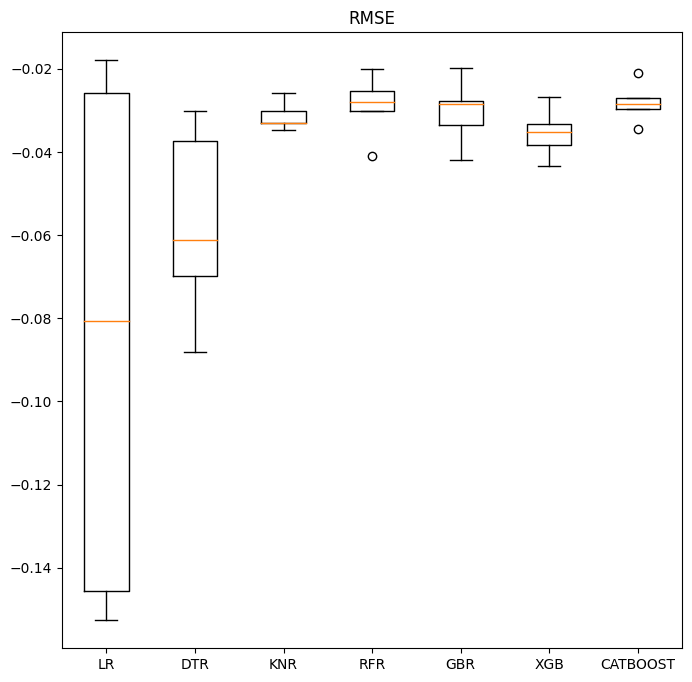

In [300]:
from sklearn.model_selection import TimeSeriesSplit


for metric, scoring in metrics:
    results = []
    names = []
    for name, model in models:

        cv_technique = TimeSeriesSplit()
        cv_results = cross_val_score(model,                 # Pipeline
                                     X[selected_features],  # Feature matrix
                                     y,                     # Target vector
                                     cv=cv_technique,       # Cross-validation technique
                                     scoring=scoring,       # Scoring
                                     n_jobs = -1) 

        msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
        print(msg)

        results.append(cv_results)
        names.append(name)

    boxplots_algorithms(results, names, metric)

## Modeling

* XGBoost. Need to use an algorithm that handles outliers, powerful and able to see features importance: xgboost fits this.

In [67]:

# Train test split
#X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42, shuffle=True)

n=int(len(df_final)*0.02) #define train test con este número

train = df_final.iloc[:-n]
test = df_final.iloc[-n:]

X_train, X_test = X.iloc[:-n], X.iloc[-n:]
y_train, y_test = train[target], test[target]

### Xgboost

In [49]:
from xgboost.sklearn import XGBRegressor
from sklearn.model_selection import RandomizedSearchCV, train_test_split, StratifiedKFold, RepeatedKFold, cross_val_score


In [50]:
# Random grid definition
n_estimators = [int(x) for x in np.linspace(800, 1000, num=5)]
max_depth = [int(x) for x in np.linspace(5, 20, num=5)]
learning_rate = [round(x,4) for x in np.linspace(0.0001, 0.5, num=4)]
booster = ['gbtree', 'dart']

random_grid = {'n_estimators': n_estimators,

'max_depth': max_depth,

'learning_rate': learning_rate,

'booster': booster}

In [52]:
# define model
model = XGBRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X[selected_features], y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

model.fit(X_train[selected_features], y_train)

Mean MAE: 0.017 (0.001)


XGBRegressor(base_score=None, booster=None, callbacks=None,
             colsample_bylevel=None, colsample_bynode=None,
             colsample_bytree=None, early_stopping_rounds=None,
             enable_categorical=False, eval_metric=None, feature_types=None,
             gamma=None, gpu_id=None, grow_policy=None, importance_type=None,
             interaction_constraints=None, learning_rate=None, max_bin=None,
             max_cat_threshold=None, max_cat_to_onehot=None,
             max_delta_step=None, max_depth=None, max_leaves=None,
             min_child_weight=None, missing=nan, monotone_constraints=None,
             n_estimators=100, n_jobs=None, num_parallel_tree=None,
             predictor=None, random_state=None, ...)

In [54]:

# make a predictionç
y_pred = model.predict(X_test[selected_features])

#### Predictions analysis

* Output probabilities distribution
* Feature importances using different criteria

In [59]:
from sklearn.metrics import fbeta_score, accuracy_score, confusion_matrix, recall_score, precision_score
from xgboost import plot_importance

In [60]:
# calculate manually
d = y_test['log_return'] - y_pred


mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y_test['log_return']-np.mean(y_test['log_return']))**2))

print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

MAE: 0.013819743659292718
MSE: 0.000313610662306016
RMSE: 0.017709055940563743
R-Squared: 0.6202143495632358


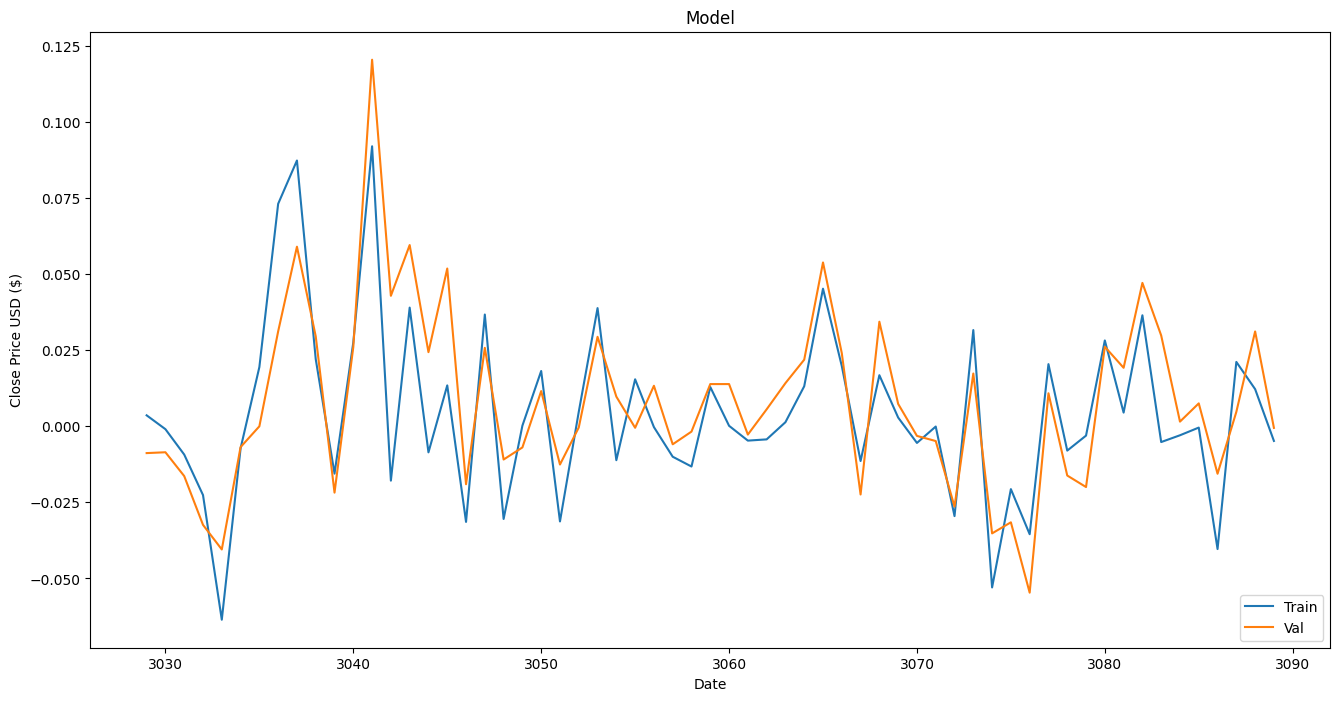

In [61]:
train = y_train
validation = y_test
validation['Predictions'] = y_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')

plt.ylabel('Close Price USD ($)')
#plt.plot(train)
plt.plot(validation[['log_return', 'Predictions']])
plt.legend(['Train', 'Val', 'Predictions'], loc='lower right')
plt.show()

<Axes: title={'center': 'Feature importance - Weight'}, xlabel='F score', ylabel='Features'>

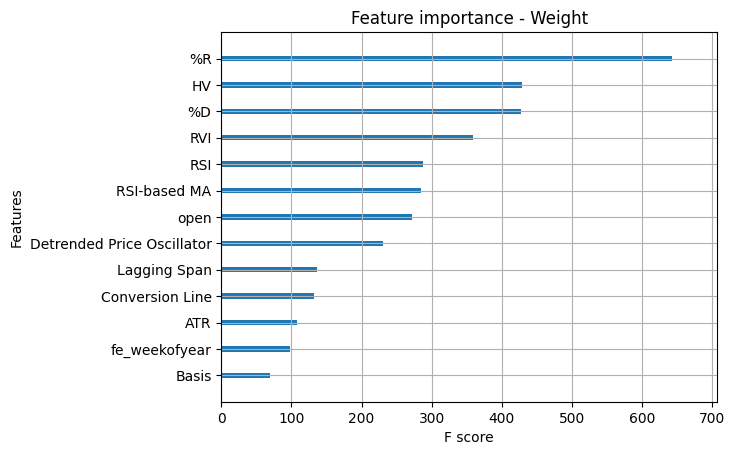

In [63]:
# ”weight” is the number of times a feature appears in a tree
plot_importance(model, importance_type='weight', show_values=False, title='Feature importance - Weight')

<Axes: title={'center': 'Feature importance - Cover'}, xlabel='F score', ylabel='Features'>

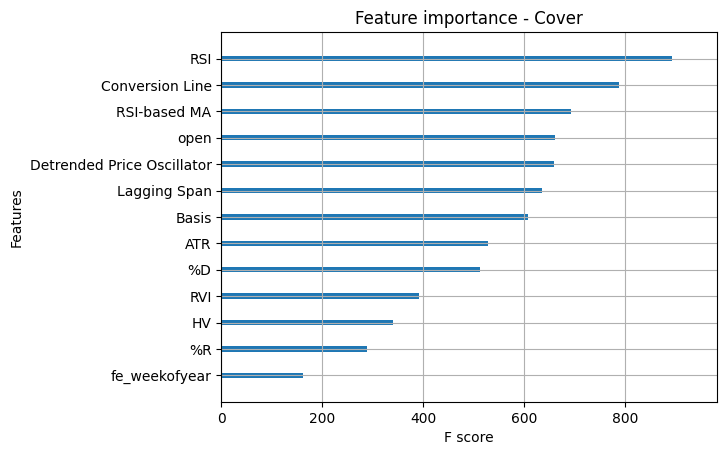

In [64]:
# ”cover” is the average coverage of splits which use the feature where coverage is defined as the number of samples affected by the split
plot_importance(model, importance_type='cover', show_values=False, title='Feature importance - Cover')

### Catboost 

In [65]:
# define model
model = CatBoostRegressor()
# define model evaluation method
cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
# evaluate model
scores = cross_val_score(model, X[selected_features], y, scoring='neg_mean_absolute_error', cv=cv, n_jobs=-1)
# force scores to be positive
scores = np.absolute(scores)
print('Mean MAE: %.3f (%.3f)' % (scores.mean(), scores.std()) )

model.fit(X_train[selected_features], y_train)

Learning rate set to 0.048124
Learning rate set to 0.048124
Learning rate set to 0.048124
Learning rate set to 0.048124
Learning rate set to 0.048124
Learning rate set to 0.048124
Learning rate set to 0.048124
Learning rate set to 0.048124
0:	learn: 0.0384383	total: 61.4ms	remaining: 1m 1s
0:	learn: 0.0387502	total: 61.4ms	remaining: 1m 1s
0:	learn: 0.0386530	total: 62.3ms	remaining: 1m 2s
0:	learn: 0.0372459	total: 62.5ms	remaining: 1m 2s
0:	learn: 0.0383618	total: 64ms	remaining: 1m 3s
1:	learn: 0.0379267	total: 63.8ms	remaining: 31.8s
0:	learn: 0.0381694	total: 64.3ms	remaining: 1m 4s
1:	learn: 0.0368003	total: 65ms	remaining: 32.4s
1:	learn: 0.0379124	total: 66.3ms	remaining: 33.1s
2:	learn: 0.0374856	total: 66.1ms	remaining: 22s
1:	learn: 0.0376996	total: 66.7ms	remaining: 33.3s
2:	learn: 0.0363962	total: 67.3ms	remaining: 22.4s
1:	learn: 0.0382159	total: 67.2ms	remaining: 33.5s
2:	learn: 0.0374309	total: 68.7ms	remaining: 22.8s
1:	learn: 0.0381368	total: 68.9ms	remaining: 34.4s
3

In [ ]:
# make a predictionç
y_pred = model.predict(X_test)

In [ ]:
# calculate manually
d = y_test['log_return'] - y_pred


mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y_test['log_return']-np.mean(y_test['log_return']))**2))

print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)



#sin standarscaler
# MAE: 0.009985587327303822
# MSE: 0.00020582919829255377
# RMSE: 0.014346748701101367
# R-Squared: 0.7507387810809274

#con standarscaler
# MAE: 0.010217728460076413
# MSE: 0.00020795000073783786
# RMSE: 0.014420471585140269
# R-Squared: 0.7481704680962618

#con minmax
# MAE: 0.010193746161201844
# MSE: 0.00021572286241951322
# RMSE: 0.014687507018534943
# R-Squared: 0.7387574548146867


MAE: 0.011499529151292463
MSE: 0.00023026240900669316
RMSE: 0.015174399790657064
R-Squared: 0.7211499183965544


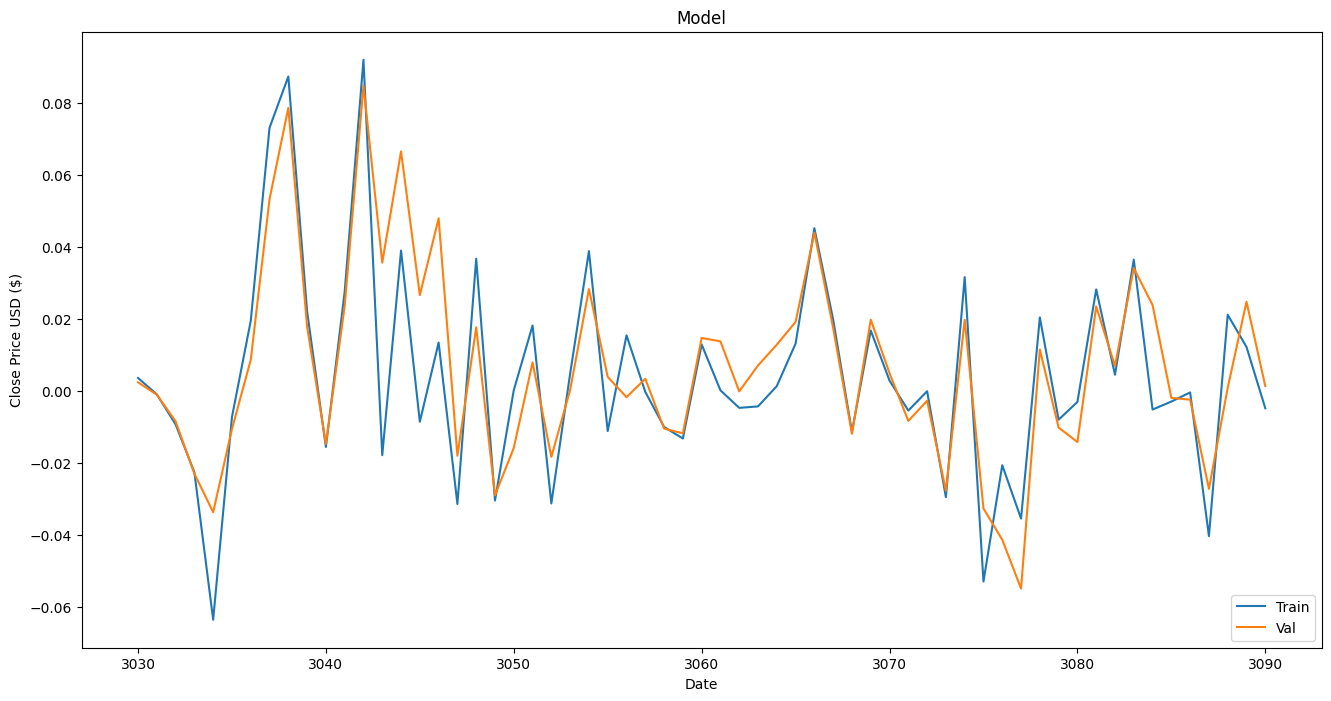

In [ ]:
train = y_train
validation = y_test
validation['Predictions'] = y_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')

plt.ylabel('Close Price USD ($)')
#plt.plot(train)
plt.plot(validation[['log_return', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

### LSTM

In [77]:
import math
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM, Bidirectional, Dropout
from tensorflow.keras.optimizers import Adam

In [80]:

# Define the LSTM model
model = Sequential()
model.add(Bidirectional(LSTM(50, return_sequences=True), input_shape=(X.shape[1], 1)))
model.add(Dropout(0.2))
model.add(Bidirectional(LSTM(50)))
model.add(Dropout(0.2))
model.add(Dense(1))

# Compile and train the model
model.compile(optimizer=Adam(lr=0.001), loss='mean_squared_error')
model.fit(X_train, y_train, epochs=5, batch_size=32, verbose=1)

Epoch 1/5
95/95 [==============================] - 3s 13ms/step - loss: 0.0021
Epoch 2/5
95/95 [==============================] - 1s 13ms/step - loss: 0.0016
Epoch 3/5
95/95 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 4/5
95/95 [==============================] - 1s 13ms/step - loss: 0.0015
Epoch 5/5
95/95 [==============================] - 1s 13ms/step - loss: 0.0015


In [81]:
y_pred = model.predict(X_test)
#y_pred = pd.DataFrame(y_pred)

2/2 [==============================] - 0s 5ms/step


In [83]:
# calculate manually
d = y_test['log_return'] - y_pred[0]


mse_f = np.mean(d**2)
mae_f = np.mean(abs(d))
rmse_f = np.sqrt(mse_f)
r2_f = 1-(sum(d**2)/sum((y_test['log_return']-np.mean(y_test['log_return']))**2))

print("MAE:",mae_f)
print("MSE:", mse_f)
print("RMSE:", rmse_f)
print("R-Squared:", r2_f)

MAE: 0.04096759267625455
MSE: 0.0023668488489271607
RMSE: 0.048650270800142115
R-Squared: -1.8662776417282059


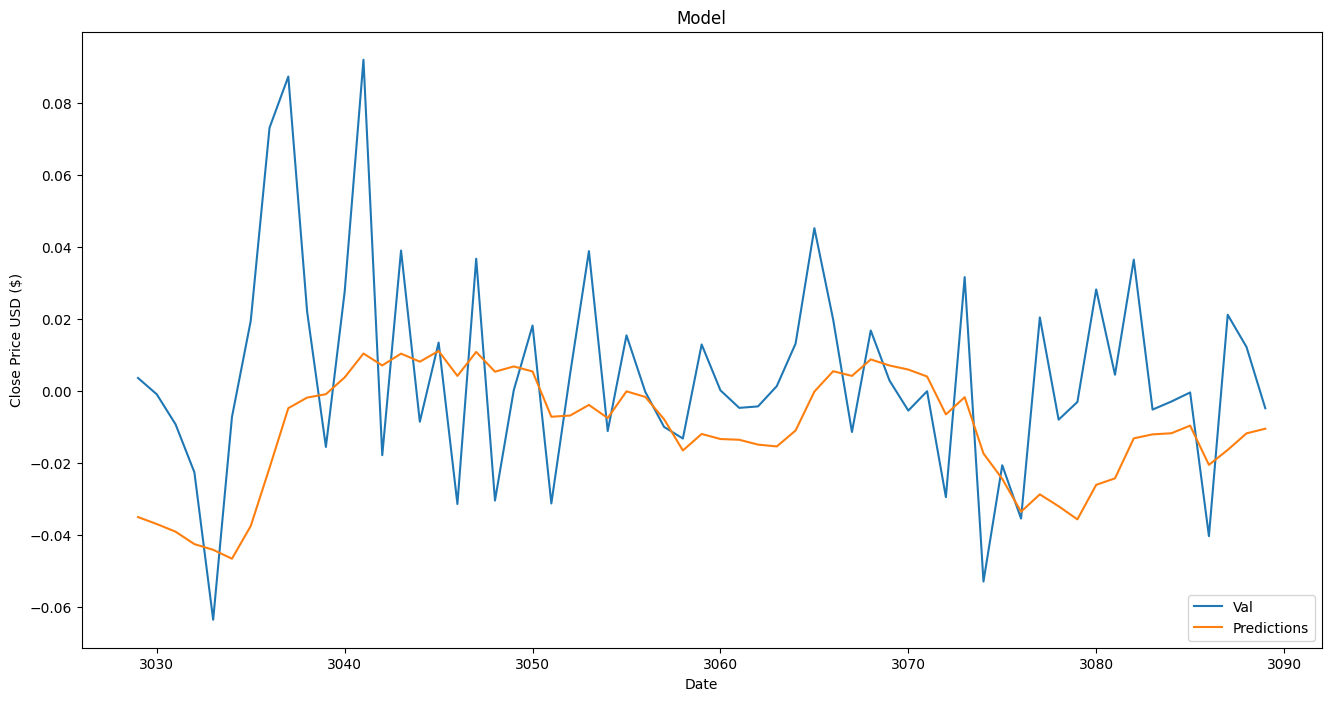

In [84]:
train = y_train
validation = y_test
validation['Predictions'] = y_pred
plt.figure(figsize=(16,8))
plt.title('Model')
plt.xlabel('Date')

plt.ylabel('Close Price USD ($)')
#plt.plot(train)
plt.plot(validation[['log_return', 'Predictions']])
plt.legend(['Val', 'Predictions'], loc='lower right')
plt.show()

In [85]:
validation

log_return  Predictions
3029    0.003618    -0.035045
3030   -0.000937    -0.036989
3031   -0.009281    -0.039114
3032   -0.022596    -0.042562
3033   -0.063581    -0.044144
...          ...          ...
3085   -0.000410    -0.009625
3086   -0.040345    -0.020538
3087    0.021178    -0.016379
3088    0.012233    -0.011782
3089   -0.004799    -0.010489

[61 rows x 2 columns]